In [13]:
%pylab inline

# Params
BASEDATADIR = "/storage/mgymrek/gtex-estrs/revision/mashr/output-strs/"
BASERESULTSDIR = "/storage/mgymrek/gtex-estrs-paper/revision/results"

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True
from matplotlib.colors import Colormap

# Import libraries
import os
import pandas as pd
import scipy.stats

COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
}

lfsr = pd.read_csv(BASEDATADIR + "posterior_lfsr.tsv", sep="\t", index_col=0)
betas = pd.read_csv(BASEDATADIR + "posterior_betas.tsv", sep="\t", index_col=0)
beta_ses = pd.read_csv(BASEDATADIR + "posterior_beta_ses.tsv", sep="\t", index_col=0)
ntissues = len(lfsr.columns)

Populating the interactive namespace from numpy and matplotlib


In [30]:
# MashR heatmaps
sharing_thresh = 2

#order same as (subset of) fig2a https://www.nature.com/articles/nature24277.pdf
ORDER = [ \
    'Brain-Caudate',
    'Brain-Cerebellum',
    'WholeBlood',
    'Cells-Transformedfibroblasts',
    'Muscle-Skeletal',
    'Heart-LeftVentricle',
    'Esophagus-Mucosa',
    'Skin-NotSunExposed',
    'Skin-SunExposed',
    'Thyroid',
    'Esophagus-Muscularis',
    'Artery-Aorta',
    'Artery-Tibial',
    'Lung',
    'Nerve-Tibial',     
    'Adipose-Subcutaneous',
    'Adipose-Visceral'
]

#for i in range(len(ORDER)):
#    ORDER[i] = ORDER[i].replace("-", ".")
o_lfsr = lfsr.loc[:, ORDER]
o_betas = betas.loc[:, ORDER]

lfsr_thresh = 0.01
sharing_thresh = 2

# Of effects sig in at least one, how many shared within factor of 2
shareMatrix = np.full((ntissues, ntissues), np.nan)
# Correlation of effect sizes
corrMatrix = np.full((ntissues, ntissues), np.nan)

for tissue1 in np.arange(ntissues):
    for tissue2 in np.arange(tissue1+1):
        significant = (o_lfsr.iloc[:, tissue1] <= lfsr_thresh) | (o_lfsr.iloc[:, tissue2] <= lfsr_thresh)
        sharedEffects = abs(np.log2(o_betas.iloc[:, tissue1]/o_betas.iloc[:, tissue2])) < 1
        shareMatrix[tissue2, tissue1] = np.sum(sharedEffects & significant)/np.sum(significant)
        eff1 = o_betas[significant][ORDER[tissue1]]
        eff2 = o_betas[significant][ORDER[tissue2]]
        corrMatrix[tissue2, tissue1] = scipy.stats.spearmanr(eff1, eff2)[0]

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log2


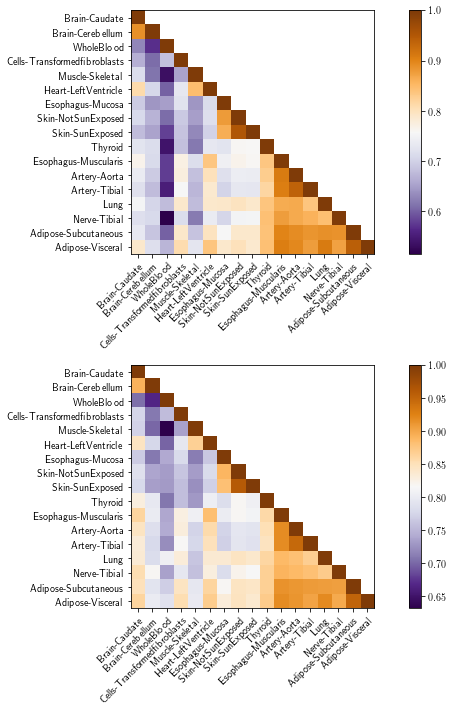

In [34]:
fig = plt.figure()
fig.set_size_inches((10, 10))

ax = fig.add_subplot(211)
im = ax.imshow(shareMatrix.T, cmap="PuOr_r")
fig.colorbar(im)
# We want to show all ticks...
ax.set_xticks(np.arange(ntissues))
ax.set_yticks(np.arange(ntissues))
ax.set_xticklabels(o_lfsr.columns.values)
ax.set_yticklabels(o_lfsr.columns.values)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
  
ax = fig.add_subplot(212)
im = ax.imshow(corrMatrix.T, cmap="PuOr_r")
fig.colorbar(im)
# We want to show all ticks...
ax.set_xticks(np.arange(ntissues))
ax.set_yticks(np.arange(ntissues))
ax.set_xticklabels(o_lfsr.columns.values)
ax.set_yticklabels(o_lfsr.columns.values)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


fig.tight_layout()


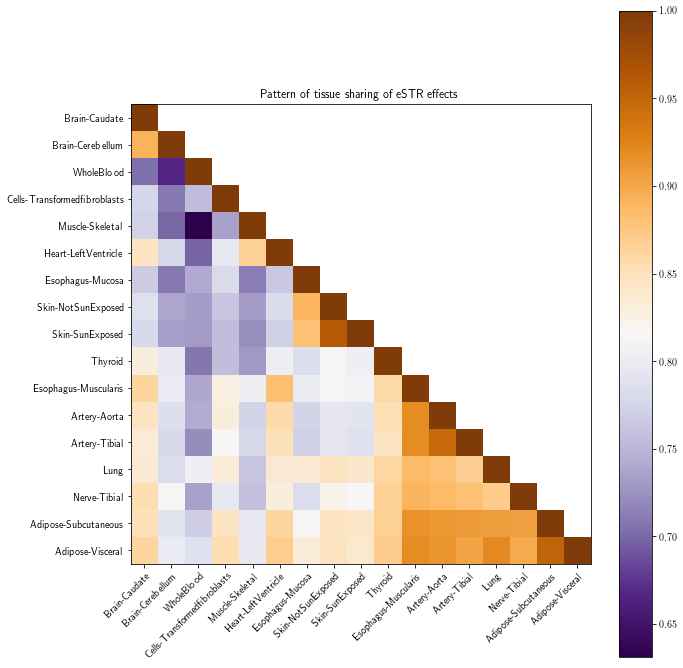

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corrMatrix.T, cmap="PuOr_r")
fig.colorbar(im)

# We want to show all ticks...
ax.set_xticks(np.arange(ntissues))
ax.set_yticks(np.arange(ntissues))
# ... and label them with the respective list entries
ax.set_xticklabels(o_lfsr.columns.values)
ax.set_yticklabels(o_lfsr.columns.values)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
  

ax.set_title("Pattern of tissue sharing of eSTR effects")
fig.tight_layout()
plt.show()